In [244]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as pp
import sklearn.cluster as cluster
import sklearn.metrics as skmet
import matplotlib
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [245]:
 #User-defined function to read data and clean
def read_data(file_path):
    df = pd.read_csv(file_path,na_values=[".."])  # Assuming data is in a CSV file

    # Clean the data (handle missing values, etc.)
    df_cleaned = df.dropna()

    return df_cleaned

file_path="3fcaeb11-610a-47dd-a30c-c68bda5e49c7_1990Data.csv"
df_cleaned = read_data(file_path)
df_cleaned

,Country Name,GDP per capita,CO2 emissions,Total greenhouse gas emissions,Forest area,"Population, total",Methane emissions
0,Algeria,2431.551360,2.466366,122219.489400,0.699908,25518074,54129.634350
2,Angola,949.921356,0.554941,43185.609210,63.578070,11828638,21316.782810
3,Antigua and Barbuda,7255.406303,3.445553,358.408496,22.977273,63328,125.550614
4,Argentina,4330.968191,3.073563,249188.761200,12.863715,32637657,111946.930000
6,Australia,18248.940710,15.437183,490531.250700,17.427359,17065128,143963.451800
...,...,...,...,...,...,...,...
208,Sri Lanka,466.897657,0.223156,23708.914700,37.479349,17204094,17847.641010
209,Sweden,30593.672440,6.232881,68991.819540,68.893359,8558835,8544.312771
210,Switzerland,39574.539810,6.451698,52841.497680,29.180908,6715519,6438.125825
212,Turkiye,2773.269759,2.562358,205436.340100,25.705183,54324142,38200.881840


In [246]:
# User-defined function for transposing data
def preprocess_data(df):
    # Transpose the dataframe
    df_transposed = df_cleaned.transpose()

    return df_transposed

df_transposed = preprocess_data(df_cleaned)
df_transposed

,0,2,3,4,6,7,8,9,10,11,...,198,199,200,201,207,208,209,210,212,215
Country Name,Algeria,Angola,Antigua and Barbuda,Argentina,Australia,"Bahamas, The",Bahrain,Barbados,Belize,Benin,...,Pakistan,Poland,Portugal,Romania,Spain,Sri Lanka,Sweden,Switzerland,Turkiye,United Kingdom
GDP per capita,2431.55136,949.921356,7255.406303,4330.968191,18248.94071,11696.51137,8174.797232,7772.808757,2988.60482,381.805056,...,346.668516,1731.209509,7884.617988,1648.48523,13804.87679,466.897657,30593.67244,39574.53981,2773.269759,19095.467
CO2 emissions,2.466366,0.554941,3.445553,3.073563,15.437183,7.442764,20.752003,3.879661,1.863749,0.064306,...,0.511428,9.189384,4.113764,7.440515,5.530368,0.223156,6.232881,6.451698,2.562358,9.813069
Total greenhouse gas emissions,122219.4894,43185.60921,358.408496,249188.7612,490531.2507,2183.995157,15950.83482,3128.995934,6521.858891,4047.791367,...,160495.1617,422343.8952,56208.04725,223413.9697,275616.0461,23708.9147,68991.81954,52841.49768,205436.3401,749506.1766
Forest area,0.699908,63.57807,22.977273,12.863715,17.427359,50.935065,0.318841,14.651163,70.145989,42.880011,...,6.468958,28.998661,37.147541,27.778504,27.840501,37.479349,68.893359,29.180908,25.705183,11.48266
"Population, total",25518074,11828638,63328,32637657,17065128,270679,517418,258868,182589,5133419,...,115414069,38110782,9983218,23201835,38867322,17204094,8558835,6715519,54324142,57247586
Methane emissions,54129.63435,21316.78281,125.550614,111946.93,143963.4518,144.817313,5048.410585,2072.516828,6108.344355,2162.093028,...,73526.04146,45216.04774,11084.63871,29861.35631,34073.9811,17847.64101,8544.312771,6438.125825,38200.88184,111251.7682


In [279]:
corr = df_cleaned.corr(numeric_only=True)
print(corr.round(4))

                                 GDP per capita  CO2 emissions  \
GDP per capita                           1.0000         0.6601   
CO2 emissions                            0.6601         1.0000   
Total greenhouse gas emissions           0.2177         0.2879   
Forest area                             -0.0552        -0.1960   
Population, total                       -0.0348        -0.0155   
Methane emissions                        0.0604         0.1414   

                                 Total greenhouse gas emissions   Forest area  \
GDP per capita                                            0.2177      -0.0552   
CO2 emissions                                             0.2879      -0.1960   
Total greenhouse gas emissions                            1.0000      -0.0333   
Forest area                                              -0.0333       1.0000   
Population, total                                         0.6128      -0.0615   
Methane emissions                                  

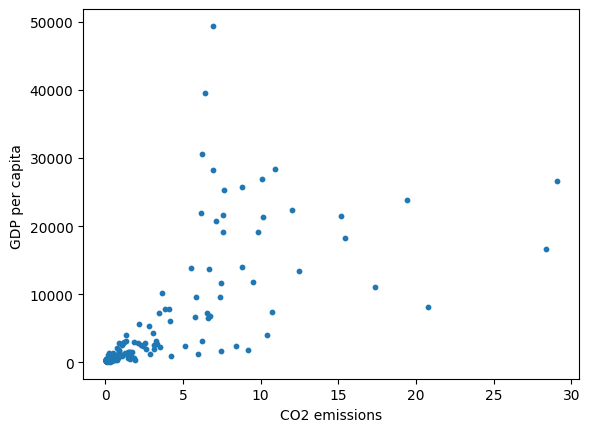

In [280]:
plt.scatter(df_cleaned["CO2 emissions"], df_cleaned["GDP per capita"], 10, marker="o")
plt.xlabel("CO2 emissions")
plt.ylabel("GDP per capita ")
plt.show()

[[ 2.00236072e-01  1.76101005e-01]
 [-1.42119185e-01 -6.93499123e-02]
 [ 3.75618409e-01  9.75234134e-01]
 [ 3.08991242e-01  4.90763642e-01]
 [ 2.52343949e+00  2.79645340e+00]
 [ 1.09155898e+00  1.71095986e+00]
 [ 3.47537713e+00  1.12754297e+00]
 [ 4.53371391e-01  1.06094845e+00]
 [ 9.23013303e-02  2.68384019e-01]
 [-2.29996878e-01 -1.63465627e-01]
 [ 2.11837232e-02 -1.13081342e-01]
 [ 1.33321814e-01  2.41400862e-01]
 [-6.31969852e-03  2.81080005e-01]
 [ 1.98792398e+00  1.99990188e+00]
 [-2.29861574e-01 -1.70452161e-01]
 [-2.35387404e-01 -1.92516270e-01]
 [-1.51213686e-01 -8.72607633e-02]
 [-1.96073318e-01 -4.82424572e-02]
 [ 2.47181758e+00  3.33931708e+00]
 [-2.32078571e-01 -1.41756214e-01]
 [-2.29560893e-01 -1.77288193e-01]
 [ 1.68357706e-01  1.84717043e-01]
 [ 1.01399694e-01 -1.69135715e-01]
 [ 2.96902069e-02  1.64014534e-02]
 [-2.14302516e-01 -6.16289180e-02]
 [-2.25692854e-01 -1.83770574e-01]
 [-1.15687418e-03 -3.23502809e-02]
 [-7.86839877e-02  7.28839271e-02]
 [-2.00831088e-01 -7

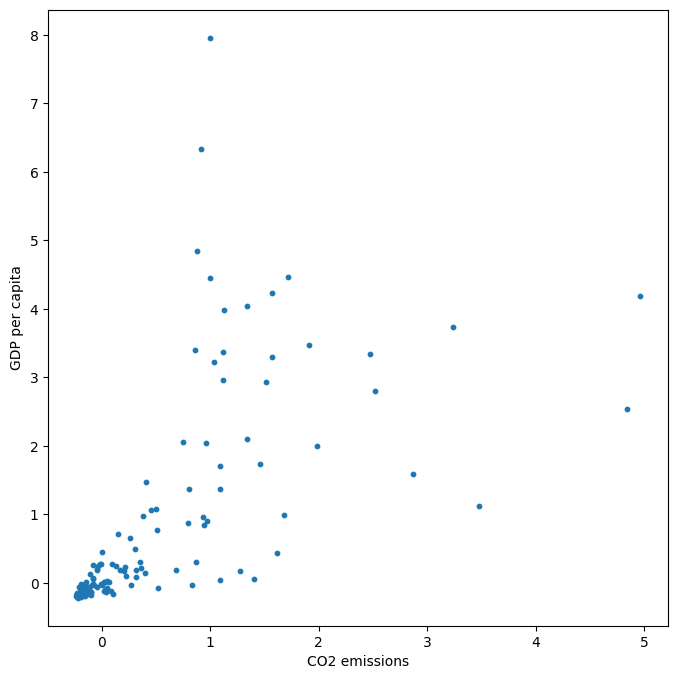

In [281]:
#create a scaler object
scaler = pp.RobustScaler()
# extract columns
df_clust = df_cleaned[["CO2 emissions", "GDP per capita"]]
# and set up the scaler
scaler.fit(df_clust)
# apply the scaling
df_norm = scaler.transform(df_clust)
# the results is now a numpy array
print(df_norm)
plt.figure(figsize=(8, 8))
plt.scatter(df_norm[:,0], df_norm[:, 1], 10, marker="o")
plt.xlabel("CO2 emissions")
plt.ylabel("GDP per capita")
plt.show()

In [282]:
def one_silhoutte(xy, n):
    """ Calculates silhoutte score for n clusters """
    # set up the clusterer with the number of expected clusters
    kmeans = cluster.KMeans(n_clusters=n, n_init=20)
    # Fit the data, results are stored in the kmeans object
    kmeans.fit(xy) # fit done on x,y pairs
    labels = kmeans.labels_
    # calculate the silhoutte score
    score = (skmet.silhouette_score(xy, labels))
    return score


# calculate silhouette score for 2 to 10 clusters
for ic in range(2, 11):
    score = one_silhoutte(df_norm, ic)
    print(f"The silhouette score for {ic: 3d} is {score: 7.4f}") # allow for minus signs


The silhouette score for   2 is  0.7546
The silhouette score for   3 is  0.6671
The silhouette score for   4 is  0.6686
The silhouette score for   5 is  0.6759
The silhouette score for   6 is  0.6308
The silhouette score for   7 is  0.5679
The silhouette score for   8 is  0.6089
The silhouette score for   9 is  0.6163
The silhouette score for  10 is  0.5576


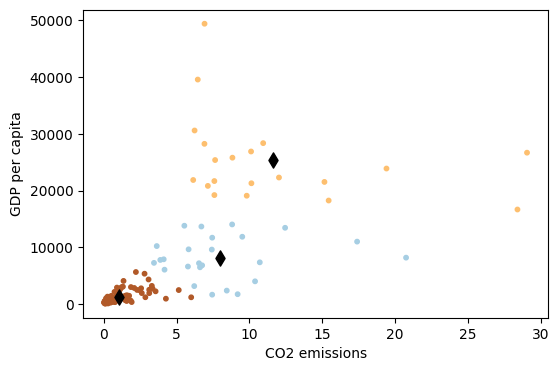

In [283]:
#set up the clusterer with the number of expected clusters
kmeans = cluster.KMeans(n_clusters=3, n_init=20)
# Fit the data, results are stored in the kmeans object
kmeans.fit(df_norm) # fit done on x,y pairs
# extract cluster labels
labels = kmeans.labels_
# extract the estimated cluster centres and convert to original scales
cen = kmeans.cluster_centers_
cen = scaler.inverse_transform(cen)
xkmeans = cen[:, 0]
ykmeans = cen[:, 1]
# extract x and y values of data points
x = df_clust["CO2 emissions"]
y = df_clust["GDP per capita"]
plt.figure(figsize=(6.0, 4.0))
cm = matplotlib.colormaps["Paired"]
# plot data with kmeans cluster number
plt.scatter(x, y, 10, labels, marker="o", cmap=cm)
# show cluster centres
plt.scatter(xkmeans, ykmeans, 60, "k", marker="d")
plt.xlabel("CO2 emissions")
plt.ylabel("GDP per capita")
plt.show()

In [ ]:
selected_countries = []

for cluster_id in range(3):  # Step 2
    indices_in_cluster = [i for i, cluster in enumerate(cluster_assignments) if cluster == cluster_id]
    
    # Find the index of the country with the maximum GDP in the cluster
    max_gdp_index = indices_in_cluster[gdp_values[i] for i in indices_in_cluster].index(max(gdp_values[i] for i in indices_in_cluster))
    country_with_max_gdp = country_names[max_gdp_index]

    # Find the index of the country with the maximum CO2 emission in the cluster
    max_co2_index = indices_in_cluster[co2_values[i] for i in indices_in_cluster].index(max(co2_values[i] for i in indices_in_cluster))
    country_with_max_co2 = country_names[max_co2_index]

    selected_countries.append((country_with_max_gdp, country_with_max_co2))

In [284]:
print(cen)

[[7.96441633e+00 8.13835054e+03]
 [1.15963027e+01 2.53776995e+04]
 [1.04432323e+00 1.19774298e+03]]


In [1]:
df = pd.read_csv('cccd5269-055b-4040-b463-8ef765c392ba_fitData.csv',na_values=[".."])

# Clean the data (handle missing values, etc.)
df_cleaned = df.dropna()


NameError: name 'df' is not defined